<a href="https://colab.research.google.com/github/ocuil/machine-learning/blob/master/HCMLC_%E2%80%93_MACHINE_LEARNING_APLICADO_A_CIBERSEGURIDAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hace uso de las fuentes en https://github.com/oreilly-mlsec/book-resources


In [0]:
import pandas as pd
df = pd.read_csv('/content/payment_fraud.csv')
df.sample(3)


,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
29472,11,2,4.921349,creditcard,0.000000,0
17818,1489,1,4.886641,creditcard,0.005556,0
13442,870,1,4.876771,creditcard,0.000000,0


In [0]:
df = pd.read_csv('/content/payment_fraud.csv')
df = pd.get_dummies(df, columns=['paymentMethod'])
df.sample(3)

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit
29947,181,1,4.836982,0.000000,0,0,0,1
7164,1424,1,4.921349,162.767361,0,1,0,0
3164,2000,1,5.017904,874.278472,0,1,0,0


In [0]:
## add by me to remove warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
##



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

df = pd.read_csv('/content/payment_fraud.csv')
df = pd.get_dummies(df, columns=['paymentMethod'])

Y = df['label']
X = df.drop('label', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=17)

clf = LogisticRegression()
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

print(confusion_matrix(Y_test, Y_pred))
print(accuracy_score(Y_pred, Y_test))


[[12753     0]
 [    1   189]]
0.999922738159623


In [0]:
pip install feature_selector

In [0]:
# Metodos de selcción de caracteristicas

from feature_selector import FeatureSelector
import pandas as pd

df = pd.read_csv('/content/payment_fraud.csv')
df = pd.get_dummies(df, columns=['paymentMethod'])

Y = df['label']
X = df.drop('label', axis=1)

fs = FeatureSelector(data = X, labels = Y)

In [0]:
#Metodo de seleccion de valores perdidos

fs.identify_missing(missing_threshold=0.8)
print(fs.missing_stats.head(10))

0 features with greater than 0.80 missing values.

                           missing_fraction
accountAgeDays                          0.0
numItems                                0.0
localTime                               0.0
paymentMethodAgeDays                    0.0
paymentMethod_creditcard                0.0
paymentMethod_paypal                    0.0
paymentMethod_storecredit               0.0


In [0]:
#Metodo de valores unicos

fs.identify_single_unique()
fs.unique_stats.sample(7)

0 features with a single unique value.



,nunique
paymentMethod_storecredit,2
paymentMethod_paypal,2
numItems,14
paymentMethodAgeDays,17094
accountAgeDays,1999
paymentMethod_creditcard,2
localTime,25


In [0]:
#Metodo de caracteristicas colineales

fs.identify_collinear(correlation_threshold=0.8)
fs.record_collinear.head()

1 features with a correlation magnitude greater than 0.80.



,drop_feature,corr_feature,corr_value
0,paymentMethod_paypal,paymentMethod_creditcard,-0.881083


Training Gradient Boosting Model


2 features with zero importance after one-hot encoding.



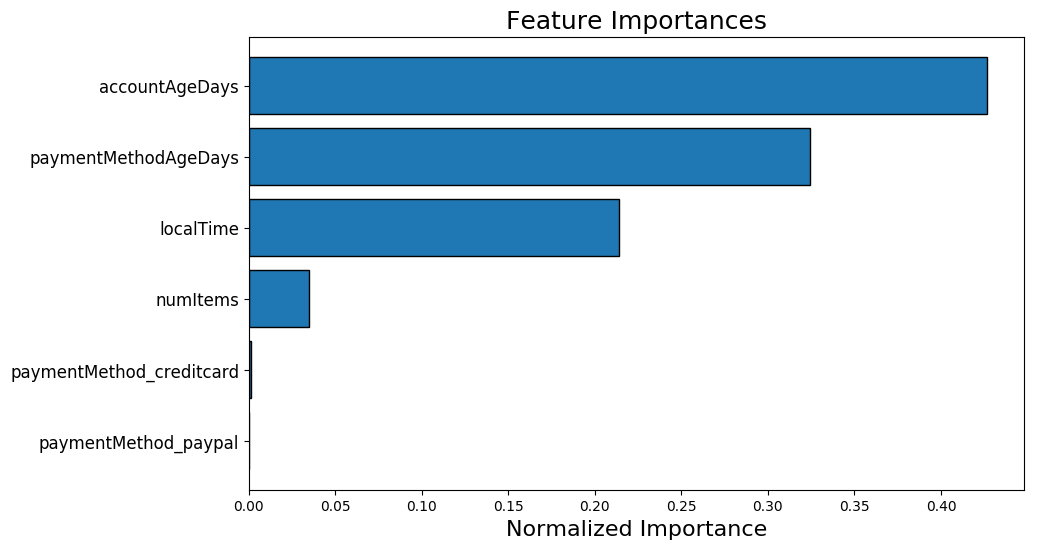

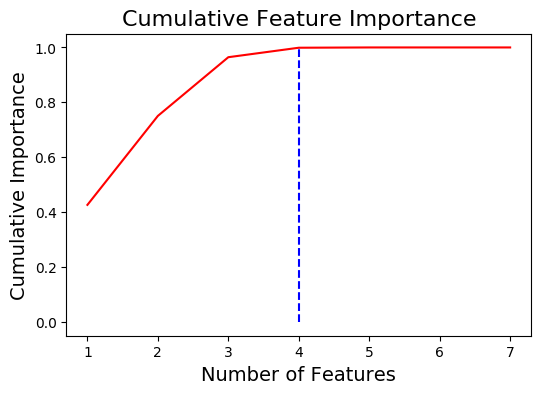

4 features required for 0.99 of cumulative importance


,feature,importance,normalized_importance,cumulative_importance
0,accountAgeDays,1249.0,0.426571,0.426571
1,paymentMethodAgeDays,949.0,0.324112,0.750683
2,localTime,626.0,0.213798,0.964481
3,numItems,101.0,0.034495,0.998975
4,paymentMethod_creditcard,3.0,0.001025,1.000000
5,paymentMethod_paypal,0.0,0.000000,1.000000
6,paymentMethod_storecredit,0.0,0.000000,1.000000


In [0]:
#Metodo de caracteristicas con 'cero' importancia

fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', n_iterations = 10, early_stopping = False)
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)
fs.feature_importances.head(10)

In [0]:
#Aqui retiramos la caracteristica de 'paymentMethod' ya que no aporta valor ...
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

df = pd.read_csv('payment_fraud.csv')

Y = df['label']
X = df.drop(['label','paymentMethod'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=17)

clf = LogisticRegression()
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

print(confusion_matrix(Y_test, Y_pred))
print(accuracy_score(Y_pred, Y_test))

[[12753     0]
 [    0   190]]
1.0


In [0]:
#Metodo de extraccion con SVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from time import time

df = pd.read_csv('payment_fraud.csv')

Y = df['label']
X = df.drop(['label','paymentMethod'], axis=1)

svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
X_svd = svd.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=17)

clf = LogisticRegression()

start_time = time()
clf.fit(X_train, Y_train)
elapsed_time = time() - start_time
print("Tiempo de entrenamiento: %0.10f seconds." % elapsed_time)

start_time = time()
Y_pred = clf.predict(X_test)
elapsed_time = time() - start_time
print("Tiempo de prediccion: %0.10f seconds." % elapsed_time)

print(confusion_matrix(Y_test, Y_pred))
print(accuracy_score(Y_pred, Y_test))

Tiempo de entrenamiento: 0.1142799854 seconds.
Tiempo de prediccion: 0.0013103485 seconds.
[[12753     0]
 [    0   190]]
1.0


In [0]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from time import time

df = pd.read_csv('payment_fraud.csv')

Y = df['label']
X = df.drop(['label','paymentMethod', 'accountAgeDays'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=17)


clf = LogisticRegression()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

print("\n", "Precision: ", accuracy_score(Y_pred, Y_test))
print("\n", "Tasa de error: ", 1 - accuracy_score(Y_pred, Y_test))

print(confusion_matrix(Y_test, Y_pred))
# se ha tenido que añadir (sin contar con lo que aparee en el video) el import de precision_score
print("\n", "Precision: ", precision_score(Y_pred, Y_test))


 Precision:  0.9851657266476087

 Tasa de error:  0.014834273352391292
[[12749     4]
 [  188     2]]

 Precision:  0.010526315789473684


In [0]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

df = pd.read_csv('/content/payment_fraud.csv')
df = pd.get_dummies(df, columns=['paymentMethod'])

X_train, X_test, y_train, y_test = train_test_split(df.drop(['label'], axis=1), 
                                                    df['label'], 
                                                    test_size=0.33, 
                                                    random_state=17)

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("F1-score:", f1_score(y_test, y_pred))


F1-score: 0.9973614775725593


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


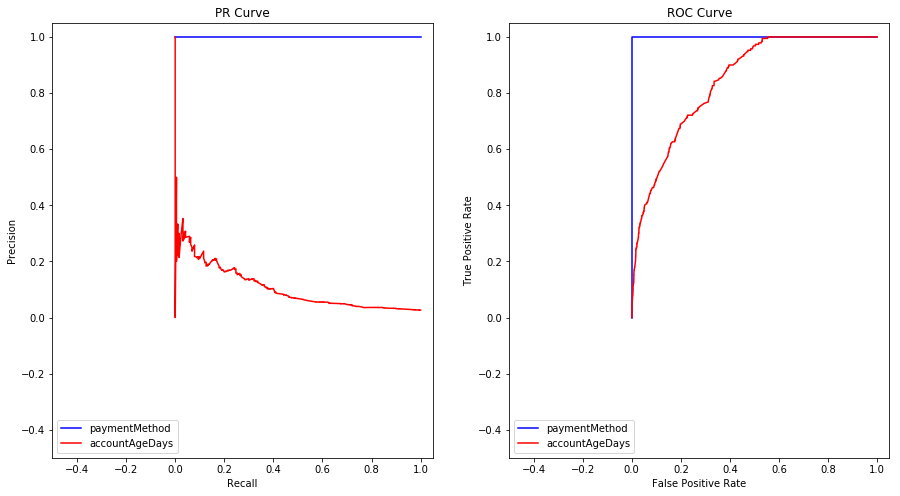

In [0]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

df = pd.read_csv('/content/payment_fraud.csv')

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.5,1.05])
ax1.set_ylim([-0.5,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.5,1.05])
ax2.set_ylim([-0.5,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')


for w,k in zip(['paymentMethod', 'accountAgeDays'], 'br'):
    if w != 'paymentMethod':
        df = pd.get_dummies(df, columns=['paymentMethod'])
    
    X_train, X_test, y_train, y_test = train_test_split(df.drop(['label', w], axis=1), 
                                                    df['label'], 
                                                    test_size=0.33 , 
                                                    random_state=17)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    pred_prob = clf.predict_proba(X_test)[:,1]
    
    p,r,_ = precision_recall_curve(y_test, pred_prob)
    tpr,fpr,_ = roc_curve(y_test, pred_prob)
    
    ax1.plot(r,p,c=k,label=w)
    ax2.plot(tpr,fpr,c=k,label=w)
    
ax1.legend(loc='lower left')
ax2.legend(loc='lower left')

plt.show()

In [0]:
import pandas as pd

df = pd.read_csv('creditcard.csv')
df.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [0]:
list(df)


['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [0]:
len(df[df.Class == 0])

114719

In [0]:
len(df[df.Class == 1])

242

In [0]:
df.Class.unique()

array([ 0.,  1., nan])

In [0]:
df.V1

0         -1.359807
1          1.191857
2         -1.358354
3         -0.966272
4         -1.158233
5         -0.425966
6          1.229658
7         -0.644269
8         -0.894286
9         -0.338262
10         1.449044
11         0.384978
12         1.249999
13         1.069374
14        -2.791855
15        -0.752417
16         1.103215
17        -0.436905
18        -5.401258
19         1.492936
20         0.694885
21         0.962496
22         1.166616
23         0.247491
24        -1.946525
25        -2.074295
26         1.173285
27         1.322707
28        -0.414289
29         1.059387
            ...    
168456     0.031505
168457    -0.519421
168458     0.910462
168459    -0.491039
168460     1.894207
168461     1.485691
168462     2.141920
168463    -0.805176
168464     2.058574
168465    -0.944500
168466     2.058747
168467    -0.084379
168468    -1.514693
168469   -18.903968
168470     0.255123
168471    -0.156298
168472    -0.646675
168473     0.825483
168474    -0.957373


In [0]:
df['Class']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        0.0
28        0.0
29        0.0
         ... 
168456    0.0
168457    0.0
168458    0.0
168459    0.0
168460    0.0
168461    0.0
168462    0.0
168463    0.0
168464    0.0
168465    0.0
168466    0.0
168467    0.0
168468    0.0
168469    0.0
168470    0.0
168471    0.0
168472    0.0
168473    0.0
168474    0.0
168475    0.0
168476    0.0
168477    0.0
168478    0.0
168479    0.0
168480    0.0
168481    0.0
168482    0.0
168483    0.0
168484    0.0
168485    NaN
Name: Class, Length: 168486, dtype: float64

In [0]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("creditcard.csv")
features = [ f for f in list (df) if f not in ["Class", "Amount", "Time"]]
rnd_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rnd_clf.fit(df.iloc[:,1:29],df.iloc[:,30])X

x, y = (list(x) for x in zip(*sorted(zip(rnd_clf.feature_importances_, df.iloc[:,1:29].columns), reverse = True)))

for xe, ye in zip(x, y):
    print(ye, "-", xe)

V17 - 0.18240053481425814
V14 - 0.14446696639991408
V12 - 0.13234432564343263
V10 - 0.10144749886503578
V11 - 0.07745576059833321
V16 - 0.042240973230260374
V4 - 0.0389204552302894
V3 - 0.03744517002582191
V7 - 0.029923253055630834
V9 - 0.027871587945440472
V18 - 0.020816197155352326
V19 - 0.012702062204011521
V8 - 0.01204392865413024
V21 - 0.01195397426630823
V26 - 0.011785187869373942
V20 - 0.011574249107405848
V1 - 0.011004386133911468
V27 - 0.01059821400203368
V2 - 0.009946781922962153
V6 - 0.008923898903588605
V28 - 0.008809189891428816
V15 - 0.008688311090286938
V5 - 0.008686891678194057
V13 - 0.008595315312412704
V22 - 0.007961248826809937
V25 - 0.007293445325850915
V23 - 0.007090864756069252
V24 - 0.007009327091452588


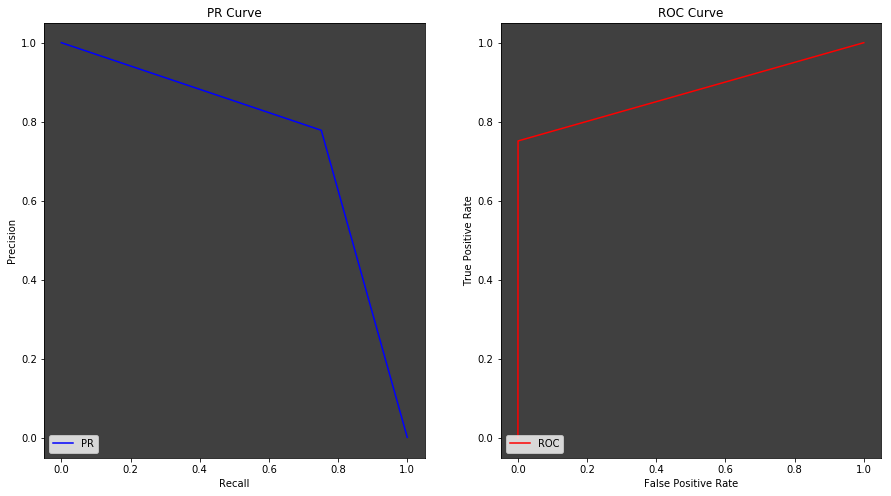

Confusion Matrix 
 [[93777    37]
 [   43   130]]
F1_score:  0.7647058823529412
Precision:  0.7514450867052023
Recall:  0.7784431137724551


In [0]:
import pandas as pd
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score, precision_recall_curve, roc_curve
from sklearn import tree
from sklearn.preprocessing import scale
from sklearn.decomposition import TruncatedSVD
from matplotlib import pyplot as plt

df = pd.read_csv("creditcard.csv")
df = df[['V17','V14','V12','V10','V11','V16','V4','V3','V7','V9','V18','Class']]

Y = df['Class']
X = df.drop('Class', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

dot_data = tree.export_graphviz(clf, out_file=None)

graph = graphviz.Source(dot_data)
graph.render("iris", view=True)

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')
ax1.set_facecolor((0.25, 0.25, 0.25))

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')
ax2.set_facecolor((0.25, 0.25, 0.25))

pred_prob = clf.predict_proba(X_test)[:, 1]

p,r,_ = precision_recall_curve(Y_test, pred_prob)
tpr,fpr,_ = roc_curve(Y_test, pred_prob)
   
ax1.plot(r, p, c='b',label='PR')
ax2.plot(tpr, fpr, c='r',label='ROC')

ax1.legend(loc='lower left')
ax2.legend(loc='lower left')

plt.show()

print("Confusion Matrix \n",confusion_matrix(Y_test, Y_pred))
print("F1_score: ", f1_score(Y_pred, Y_test, average="binary"))
print("Precision: ", precision_score(Y_pred, Y_test, average="binary"))
print("Recall: ", recall_score(Y_pred, Y_test, average="binary"))
